In [1]:
import brainsss
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import random
from scipy.stats import sem
import time
import h5py
import ants
import nibabel as nib
import matplotlib
import pickle
from shutil import copyfile
from mpl_toolkits.axes_grid1 import ImageGrid
from skimage.filters import threshold_otsu as otsu
from scipy.ndimage.morphology import binary_erosion
from scipy.ndimage.morphology import binary_dilation

/home/users/brezovec/.local/lib/python3.6/site-packages/ants/viz/render_surface_function.py:16: UserWarning: Cant import Plotly. Install it `pip install chart_studio` if you want to use ants.render_surface_function
  "Cant import Plotly. Install it `pip install chart_studio` if you want to use ants.render_surface_function"


In [3]:
# def load_FDA():
#     FDA_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/20220301_luke_2_jfrc_affine.nii'
#     FDA = np.asarray(nib.load(FDA_file).get_fdata().squeeze(), dtype='float32')
#     FDA = ants.from_numpy(FDA)
#     FDA.set_spacing((.38,.38,.38))
#     #FDA_lowres = ants.resample_image(FDA,(2,2,2),use_voxels=False)
#     FDA_lowres = ants.resample_image(FDA,(.76,.76,.76),use_voxels=False)
#     return FDA, FDA_lowres

# FDA, FDA_lowres = load_FDA()

KeyboardInterrupt: 

In [3]:
# FDA_lowres = ants.from_numpy(FDA_lowres[:,:,::-1])
# FDA_lowres.set_spacing((2,2,2))

In [2]:
# bbox = {'x_start': 225, 'x_end': 325,
#         'y_start': 150, 'y_end': 225,
#         'z_start': 40, 'z_end': 140}

bbox = {'x_start': 200, 'x_end': 325,
        'y_start': 150, 'y_end': 225,
        'z_start': 40, 'z_end': 140}

# Look at warped indiv LC11 gloms in FDA

In [50]:
brains = {}
brain_types = ['clandinin', 'murthy', 'clandinin_flip', 'murthy_flip']
for brain_type in brain_types:
    if 'clandinin' in brain_type:
        dir_ = "/oak/stanford/groups/trc/data/Alex/clab_data/LC11/func/aligned_to_FDA/"
    elif 'murthy' in brain_type:
        dir_ = "/oak/stanford/groups/trc/data/Alex/albert_data/LC11/func/aligned_to_FDA/"
        
    brains[brain_type] = []
    for file in os.listdir(dir_):
        print(file)
        to_load = os.path.join(dir_,file)
        image = ants.image_read(to_load)
        
        if 'flip' in brain_type:
            brains[brain_type].append(image[::-1,:,:])
        else:
            brains[brain_type].append(image)

210208_03_green_registered.nii
210208_02_green_registered.nii
210223_03_green_registered.nii
210216_02_green_registered.nii
210223_04_green_registered.nii
210218_02_green_registered.nii
210223_01_green_registered.nii
210216_04_green_registered.nii
210223_02_green_registered.nii
220426_LC11_vol2_local_atlas_green_registered.nii
220413_LC11_vol1_local_atlas_green_registered.nii
220425_LC11_vol1_local_atlas_green_registered.nii
220420_LC11_vol1_local_atlas_green_registered.nii
220420_LC11_vol2_local_atlas_green_registered.nii
220412_LC11_vol1_local_atlas_green_registered.nii
220419_LC11_vol2_local_atlas_green_registered.nii
220426_LC11_vol1_local_atlas_green_registered.nii
210208_03_green_registered.nii
210208_02_green_registered.nii
210223_03_green_registered.nii
210216_02_green_registered.nii
210223_04_green_registered.nii
210218_02_green_registered.nii
210223_01_green_registered.nii
210216_04_green_registered.nii
210223_02_green_registered.nii
220426_LC11_vol2_local_atlas_green_registe

In [38]:
dir_ = "/oak/stanford/groups/trc/data/Alex/clab_data/LC11/func/aligned_to_FDA/"
brains_c = []
for file in os.listdir(dir_):
    print(file)
    to_load = os.path.join(dir_,file)
    brains_c.append(ants.image_read(to_load))

210208_03_green_registered.nii
210208_02_green_registered.nii
210223_03_green_registered.nii
210216_02_green_registered.nii
210223_04_green_registered.nii
210218_02_green_registered.nii
210223_01_green_registered.nii
210216_04_green_registered.nii
210223_02_green_registered.nii


In [39]:
dir_ = "/oak/stanford/groups/trc/data/Alex/albert_data/LC11/func/aligned_to_FDA/"
brains_m = []
for file in os.listdir(dir_):
    print(file)
    to_load = os.path.join(dir_,file)
    brains_m.append(ants.image_read(to_load))

220426_LC11_vol2_local_atlas_green_registered.nii
220413_LC11_vol1_local_atlas_green_registered.nii
220425_LC11_vol1_local_atlas_green_registered.nii
220420_LC11_vol1_local_atlas_green_registered.nii
220420_LC11_vol2_local_atlas_green_registered.nii
220412_LC11_vol1_local_atlas_green_registered.nii
220419_LC11_vol2_local_atlas_green_registered.nii
220426_LC11_vol1_local_atlas_green_registered.nii


In [5]:
LC11_fda_path = "/oak/stanford/groups/trc/data/Alex/clab_data/LC11/LC11_FDA_ds_flip.nii"
LC11_fda = ants.image_read(LC11_fda_path)[:]
LC11_fda_cropped = LC11_fda[bbox['x_start']:bbox['x_end'],
                   bbox['y_start']:bbox['y_end'],
                   bbox['z_start']:bbox['z_end']]

In [40]:
brains_crop_c = []
for i in range(len(brains_c)):
    brains_crop_c.append(brains_c[i][bbox['x_start']:bbox['x_end'],
                   bbox['y_start']:bbox['y_end'],
                   bbox['z_start']:bbox['z_end']])

brains_crop_m = []
for i in range(len(brains_m)):
    brains_crop_m.append(brains_m[i][bbox['x_start']:bbox['x_end'],
                   bbox['y_start']:bbox['y_end'],
                   bbox['z_start']:bbox['z_end']])

In [7]:
pvlp_mask = "/oak/stanford/groups/trc/data/Alex/ROI_masks/pvlp_and_plp.nii"
pvlp_mask = ants.image_read(pvlp_mask).numpy()
mask_eroded = binary_erosion(pvlp_mask, structure=np.ones((2,2,2)))
mask_dilated = binary_dilation(mask_eroded, iterations=2)
pvlp_mask_cropped = mask_dilated[bbox['x_start']:bbox['x_end'],
                               bbox['y_start']:bbox['y_end'],
                               bbox['z_start']:bbox['z_end']]

nolo_mask = "/oak/stanford/groups/trc/data/Alex/ROI_masks/no_lo.nii"
nolo_mask = ants.image_read(nolo_mask).numpy()
mask_eroded = binary_erosion(nolo_mask, structure=np.ones((2,2,2)))
mask_dilated = binary_dilation(mask_eroded, iterations=2)
nolo_mask_cropped = mask_dilated[bbox['x_start']:bbox['x_end'],
                               bbox['y_start']:bbox['y_end'],
                               bbox['z_start']:bbox['z_end']]

In [41]:
mean_c = np.zeros(brains_crop_c[0].shape)
for i in range(len(brains_crop_c)):
    mean_c += brains_crop_c[i]/np.max(brains_crop_c[i])
    
mean_m = np.zeros(brains_crop_m[0].shape)
for i in range(len(brains_crop_m)):
    mean_m += brains_crop_m[i]/np.max(brains_crop_m[i])

In [165]:
dir_ = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20221014_some_lc11"
# file = os.path.join(dir_, 'pvlp_mask.nii')
# ants.image_write(ants.from_numpy(mask_dilated.astype('float')),file)
file = os.path.join(dir_, 'pvlp_and_plp_mask.nii')
ants.image_write(ants.from_numpy(mask_dilated.astype('float')),file)

In [10]:
def binarize_image(data,scale,binarize):
    if binarize:
        threshold = otsu(data)*scale
        data_binarized = np.where(data>threshold, 1, 0)
        return data_binarized
    else:
        return data
    
def calc_centroid(binary_image):
    return scipy.ndimage.measurements.center_of_mass(binary_image)

def calc_centroid_alex(binary_image):
    return np.argwhere(binary_image==1).mean(0)
        
def plot_centroid(cx,cy,cz,axis,color='r'):
    if axis==0:
        plt.scatter(cz,cy,color=color)
    elif axis==1:
        plt.scatter(cz,cx,color=color)
    elif axis==2:
        plt.scatter(cy,cx,color=color)
    
def draw_grid(vlines=5, hlines=5, lw=.5):
    for i in np.arange(0,vlines*20,20):
        plt.axvline(i,color='w',lw=lw)
    for i in np.arange(0,hlines*20,20):
        plt.axhline(i,color='w',lw=lw)
        
def clean_anat(brain):
    brain_copy = brain.copy().astype('float32')
    brain_copy = scipy.ndimage.filters.gaussian_filter(brain_copy, sigma=0.5)

    labels, label_nb = scipy.ndimage.label(brain_copy)
    brain_label = np.bincount(labels.flatten())[1:].argmax()+1

    brain_copy = np.where(labels==brain_label, 1.0, 0.0)

    return brain_copy*brain

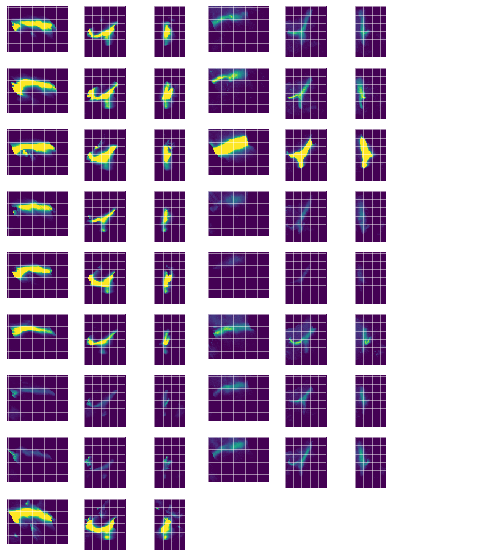

In [34]:
binarize=False

plt.figure(figsize=(10,10))
for i in range(len(brains_c)):
    for axis in [0,1,2]:
        
        plt.subplot(9,6,(6*i+axis)+1)
        image = binarize_image(brains_crop_c[i],1,binarize)
        image*=pvlp_mask_cropped
        plt.imshow(np.max(image,axis=axis),vmin=400,vmax=4000)
        draw_grid()
        plt.axis('off')
        
        try:
            plt.subplot(9,6,(6*i+axis)+4)
            image = binarize_image(brains_crop_m[i],1,binarize)
            image*=pvlp_mask_cropped
            plt.imshow(np.max(image,axis=axis),vmin=400,vmax=4000)
            draw_grid()
            plt.axis('off')
        except IndexError:
            plt.axis('off')
        
plt.subplots_adjust(wspace=-.7)
save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight',transparent=True)

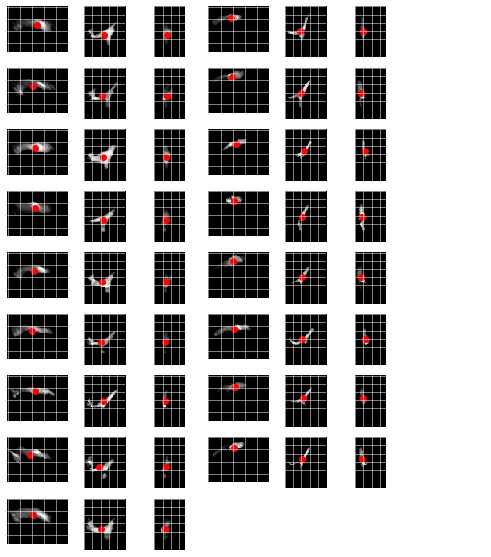

In [33]:
plt.figure(figsize=(10,10))
binarize=True
thresh_scale_c = [1,1,1,1,1,1,5,5,1]
thresh_scale_c = [i for i in thresh_scale_c]
thresh_scale_m = [4,4,2,4,4,4,4,4,4]
thresh_scale_m = [i*1.3 for i in thresh_scale_m]

centroids_c = []
centroids_m = []
mean_binary_image_c = np.zeros(brains_crop_c[0].shape)
mean_binary_image_m = np.zeros(brains_crop_m[0].shape)
for i in range(len(brains_c)):
    for axis in [0,1,2]:
        
        plt.subplot(9,6,(6*i+axis)+1)
        binary_image = binarize_image(brains_crop_c[i],thresh_scale_c[i],binarize)
        binary_image*=pvlp_mask_cropped
        binary_image = clean_anat(binary_image)
        mean_binary_image_c+=binary_image
        plt.imshow(np.mean(binary_image,axis=axis),cmap='Greys_r')
        draw_grid()
        plt.axis('off')
        cx,cy,cz = calc_centroid(binary_image)
        plot_centroid(cx,cy,cz,axis)
        if axis==0: #do once
            centroids_c.append((cx,cy,cz))
        
        try:
            plt.subplot(9,6,(6*i+axis)+4)
            binary_image = binarize_image(brains_crop_m[i],thresh_scale_m[i],binarize)
            binary_image*=pvlp_mask_cropped
            binary_image = clean_anat(binary_image)
            mean_binary_image_m+=binary_image
            plt.imshow(np.mean(binary_image,axis=axis),cmap='Greys_r')
            draw_grid()
            plt.axis('off')
            cx,cy,cz = calc_centroid(binary_image)
            plot_centroid(cx,cy,cz,axis)
            if axis==0: #do once
                centroids_m.append((cx,cy,cz))
        except IndexError:
            plt.axis('off')
        
plt.subplots_adjust(wspace=-.7)
save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight',transparent=True)

(-0.5, 99.5, 124.5, -0.5)

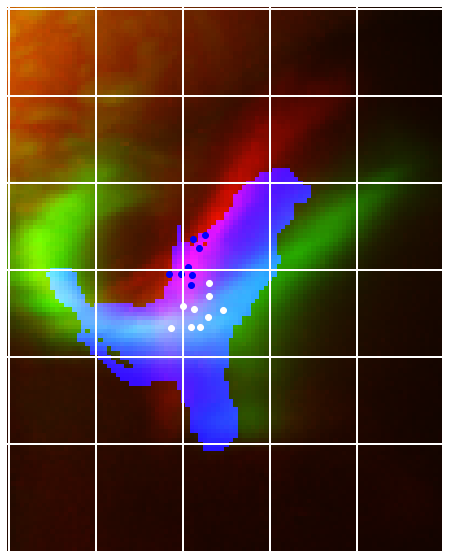

In [47]:
plt.figure(figsize=(10,10))
axis = 1
uncropped = True

if uncropped:
    g=np.max(mean_c,axis=axis)
    r=np.max(mean_m,axis=axis)
    b=np.max(LC11_fda_cropped*pvlp_mask_cropped, axis=axis)
else:
    g=np.max(mean_binary_image_c,axis=axis)
    r=np.max(mean_binary_image_m,axis=axis)
    b=np.max(LC11_fda_cropped*pvlp_mask_cropped, axis=axis)

g/=np.max(g)
r/=np.max(r)
b/=np.max(b)
rgb = np.concatenate((r[...,np.newaxis],g[...,np.newaxis],b[...,np.newaxis]),axis=2)
plt.imshow(rgb)

for i in range(len(centroids_c)):
    plot_centroid(centroids_c[i][0],
                  centroids_c[i][1],
                  centroids_c[i][2],axis,color='w')
    
for i in range(len(centroids_m)):
    plot_centroid(centroids_m[i][0],
                  centroids_m[i][1],
                  centroids_m[i][2],axis,color='blue')
draw_grid(vlines=5, hlines=6, lw=2)
plt.axis('off')

(-0.5, 99.5, 105.02499999999999, -0.5)

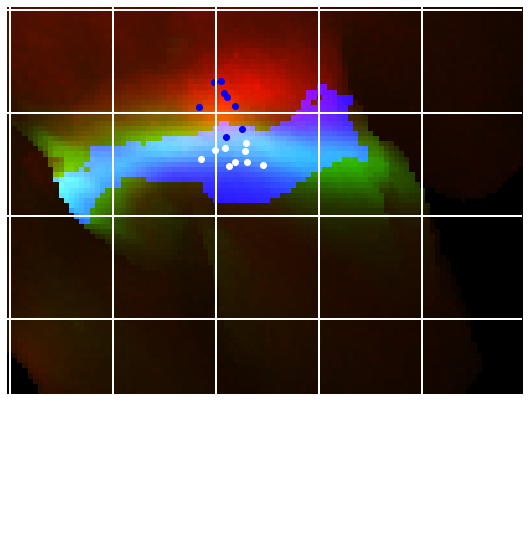

In [37]:
plt.figure(figsize=(10,10))
axis = 0
uncropped = True

if uncropped:
    g=np.max(mean_c,axis=axis)
    r=np.max(mean_m,axis=axis)
    b=np.max(LC11_fda_cropped*pvlp_mask_cropped, axis=axis)
else:
    g=np.max(mean_binary_image_c,axis=axis)
    r=np.max(mean_binary_image_m,axis=axis)
    b=np.max(LC11_fda_cropped*pvlp_mask_cropped, axis=axis)
    
g/=np.max(g)
r/=np.max(r)
b/=np.max(b)
rgb = np.concatenate((r[...,np.newaxis],g[...,np.newaxis],b[...,np.newaxis]),axis=2)
plt.imshow(rgb)

for i in range(len(centroids_c)):
    plot_centroid(centroids_c[i][0],
                  centroids_c[i][1],
                  centroids_c[i][2],axis,color='w')
    
for i in range(len(centroids_m)):
    plot_centroid(centroids_m[i][0],
                  centroids_m[i][1],
                  centroids_m[i][2],axis,color='blue')
draw_grid(vlines=5, hlines=6, lw=2)
plt.axis('off')

(-0.5, 99.5, 105.02499999999999, -0.5)

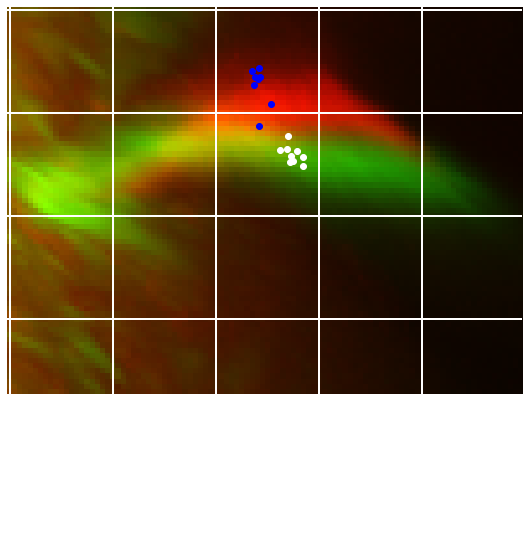

In [98]:
plt.figure(figsize=(10,10))
axis = 0

g=np.max(mean_c,axis=axis)
r=np.max(mean_m,axis=axis)
b=np.zeros(r.shape)

g/=np.max(g)
r/=np.max(r)
rgb = np.concatenate((r[...,np.newaxis],g[...,np.newaxis],b[...,np.newaxis]),axis=2)
plt.imshow(rgb)

for i in range(len(centroids_c)):
    plot_centroid(centroids_c[i][0],
                  centroids_c[i][1],
                  centroids_c[i][2],axis,color='w')
    
for i in range(len(centroids_m)):
    plot_centroid(centroids_m[i][0],
                  centroids_m[i][1],
                  centroids_m[i][2],axis,color='blue')
draw_grid(vlines=5, hlines=6, lw=2)
plt.axis('off')

In [26]:
pairwise_diffs = {}
for axis in [0,1,2]:
    a=[i[axis] for i in centroids_c]
    pairwise_diff_c = [np.abs((x-y)*.76) for i,x in enumerate(a) for j,y in enumerate(a) if i != j]
    b=[i[axis] for i in centroids_m]
    pairwise_diff_m = [np.abs((x-y)*.76) for i,x in enumerate(b) for j,y in enumerate(b) if i != j]
    pairwise_diff_cm = [np.abs((x-y)*.76) for x in a for y in b]
    pairwise_diffs[axis] = (pairwise_diff_c, pairwise_diff_m, pairwise_diff_cm)

In [27]:
def plot_violin(data,pos):
    parts = ax.violinplot(data,positions=[pos],showextrema=True,showmeans=True)
    for pc in parts['bodies']:
        pc.set_facecolor('k')
        pc.set_edgecolor('black')
        pc.set_alpha(.1)
    parts['cmeans'].set_linewidth(5)
    parts['cmeans'].set_edgecolor('black')
    parts['cmaxes'].set_linewidth(0)
    parts['cmins'].set_linewidth(0)
    parts['cbars'].set_linewidth(0)
    plt.plot([pos]*len(data),data,'o',color='k',ms=4)

Text(0, 0.5, 'Jitter, um')

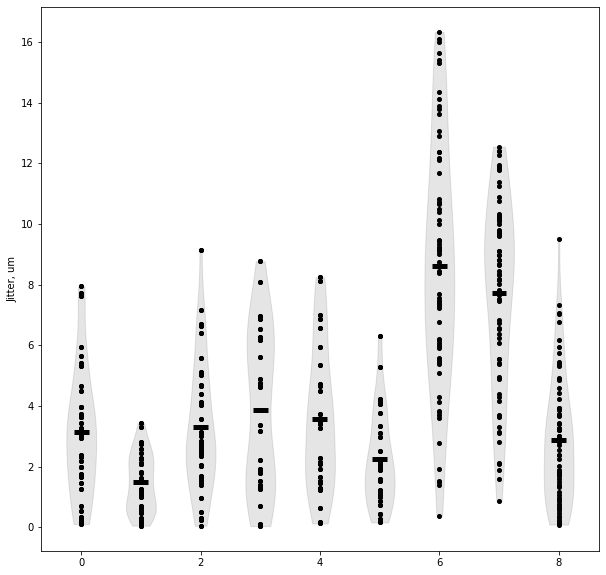

In [28]:
plt.figure(figsize=(10,10))
ax = plt.gca()

for axis in [0,1,2]:
    for lab in [0,1,2]:
        plot_violin(data=pairwise_diffs[axis][lab],pos=lab*3+axis)
plt.ylabel('Jitter, um')

Text(0, 0.5, 'Jitter, um')

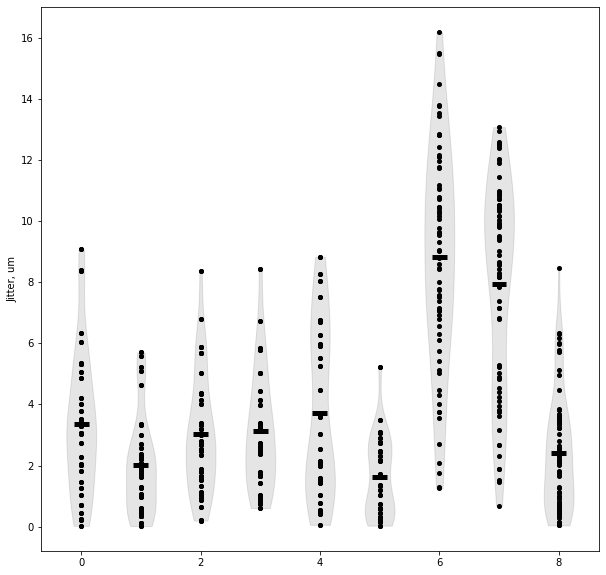

In [224]:
plt.figure(figsize=(10,10))
ax = plt.gca()

for axis in [0,1,2]:
    for lab in [0,1,2]:
        plot_violin(data=pairwise_diffs[axis][lab],pos=lab*3+axis)
plt.ylabel('Jitter, um')

Text(0, 0.5, 'Jitter, um')

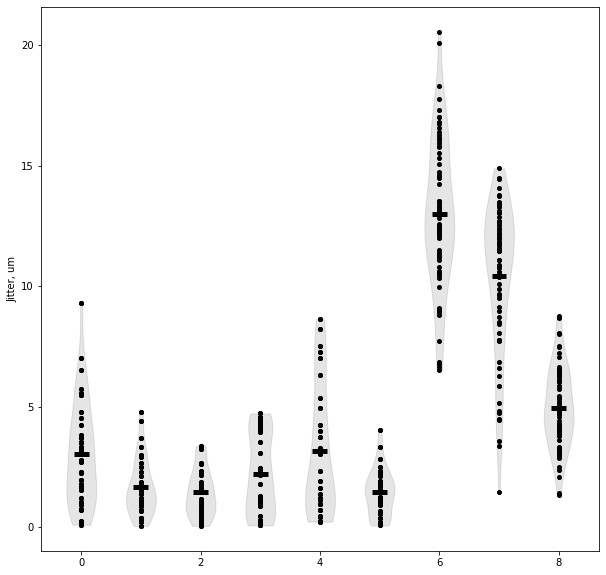

In [90]:
plt.figure(figsize=(10,10))
ax = plt.gca()

for axis in [0,1,2]:
    for lab in [0,1,2]:
        plot_violin(data=pairwise_diffs[axis][lab],pos=lab*3+axis)
plt.ylabel('Jitter, um')

In [ ]:
plt.figure(figsize=(10,3))
ax = plt.gca()
ax.axhline(0,color='k',linestyle='--')

colors=['b',(0,1,0),'r']
for k, behavior in enumerate(['Y_pos']):#behaviors):
    k=0
    for_mean = []
    for fly in fly_names:
        coefs = full_coefs['super'][fly][behavior] 
        for_mean.append(coefs)
        plt.plot(full_coefs['super'][fly][behavior],'o',color=colors[k],ms=4)
    means = np.mean(for_mean,axis=0)
    stds = np.std(for_mean,axis=0)

    for_mean = np.asarray(for_mean)
    for i in range(20):            
        
        parts = ax.violinplot(for_mean[:,i],positions=[i],showextrema=False)

        for pc in parts['bodies']:
            pc.set_facecolor(colors[k])
            pc.set_edgecolor('black')
            pc.set_alpha(.1)

plt.xticks([])
plt.yticks([])
#plt.xtick_labels([1,5,10,15,20])
#ax.set_xticklabels(list(range(1,21)))
    
plt.xlim(-1,20)
plt.ylim(-.2,.2)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight',transparent=True)

In [308]:
np.mean(np.abs(pairwise_diff))

3.5755379101057105

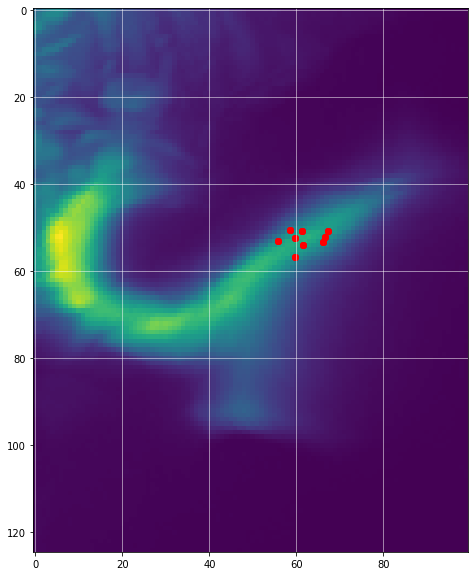

In [258]:
plt.figure(figsize=(10,10))
axis = 1
plt.imshow(np.max(mean_c,axis=axis))


for i in range(len(centroids_c)):
    plot_centroid(centroids_c[i][0],
                  centroids_c[i][1],
                  centroids_c[i][2],axis)
draw_grid()

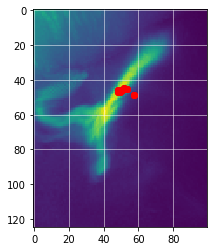

In [257]:
axis = 1
plt.imshow(np.max(mean_m,axis=axis))
for i in range(len(centroids_m)):
    plot_centroid(centroids_m[i][0],
                  centroids_m[i][1],
                  centroids_m[i][2],axis)
draw_grid()

(array([7.09901e+05, 2.18760e+04, 7.85200e+03, 4.00700e+03, 2.44800e+03,
        1.57900e+03, 1.09500e+03, 4.89000e+02, 3.88000e+02, 3.65000e+02]),
 array([-147.7931,  683.4571, 1514.7073, 2345.9575, 3177.2078, 4008.458 ,
        4839.708 , 5670.9585, 6502.2085, 7333.459 , 8164.709 ],
       dtype=float32),
 <a list of 10 Patch objects>)

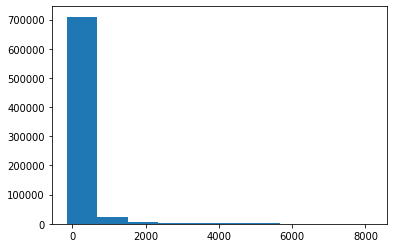

In [72]:
plt.hist(brains_crop_c[0].flatten())

ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (826, 384, 240)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

In [64]:
# ### TEST WARP
# brains_m_warp = []
# for i in range(len(brains_m)):
#     print(i)
#     out = ants.registration(ants.from_numpy(brains_crop_c[0]),
#                             ants.from_numpy(brains_crop_m[i]),
#                             type_of_transform='Affine')
#     brains_m_warp.append(out['warpedmovout'])

# ### TEST WARP
# brains_c_warp = []
# for i in range(len(brains_m)):
#     print(i)
#     out = ants.registration(ants.from_numpy(brains_crop_c[0]),
#                             ants.from_numpy(brains_crop_c[i]),
#                             type_of_transform='Affine')
#     brains_c_warp.append(out['warpedmovout'])

0
1
2
3
4
5
6
7


In [12]:
brains[0]

ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (826, 384, 240)
	 Spacing    : (0.76, 0.76, 0.76)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

In [7]:
brains[0].shape

(826, 384, 240)

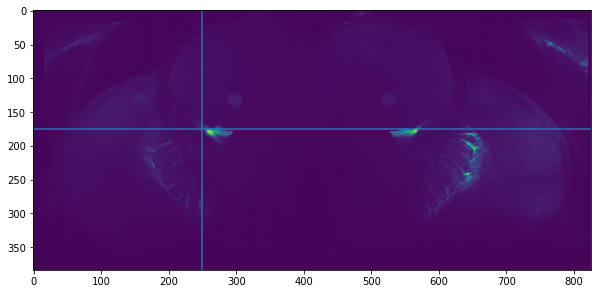

In [27]:
z=90
plt.figure(figsize=(10,10))
plt.imshow(brains[0][:,:,z].T)
plt.axhline(175)
plt.axvline(250)

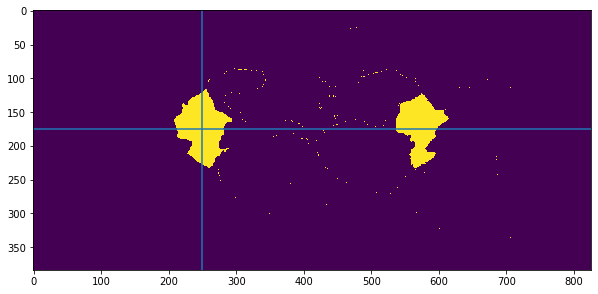

In [28]:
plt.figure(figsize=(10,10))
plt.imshow(pvlp_mask[:,:,z].T)
plt.axhline(175)
plt.axvline(250)

In [25]:
file = "/oak/stanford/groups/trc/data/Alex/clab_data/LC11/anat/raw"
#file = "/oak/stanford/groups/trc/data/Alex/clab_data/LC11/func/raw"

os.listdir(file)

['210216_04_red.nii',
 '210208_02_red.nii',
 '210208_03_red.nii',
 '210216_02_red.nii',
 '210223_03_red.nii',
 '210223_01_red.nii',
 '210218_02_red.nii',
 '210223_02_red.nii',
 '210223_04_red.nii']

In [54]:
f = os.path.join(file, "210216_04_red.nii")
#f = os.path.join(file, "210223_04_green.nii")

brain = ants.image_read(f)
brain.set_spacing((.65,.65,1))

In [55]:
brain

ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (1024, 512, 241)
	 Spacing    : (0.65, 0.65, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

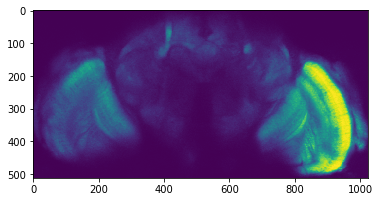

In [61]:
plt.imshow(brain[:,:,180].T)

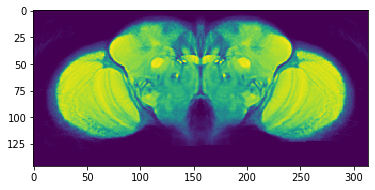

In [57]:
plt.imshow(FDA_lowres[:,:,20].T)

In [58]:
out = ants.registration(fixed=FDA_lowres,moving=brain,type_of_transform='Affine')

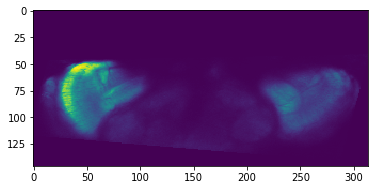

In [59]:
plt.imshow(out['warpedmovout'][:,:,50].T)

In [63]:
file = "/oak/stanford/groups/trc/data/Alex/clab_data/LC11/func/average_green_LC11_clab_fda.nii"
brain = ants.image_read(file)


In [64]:
brain.shape

(826, 384, 240)

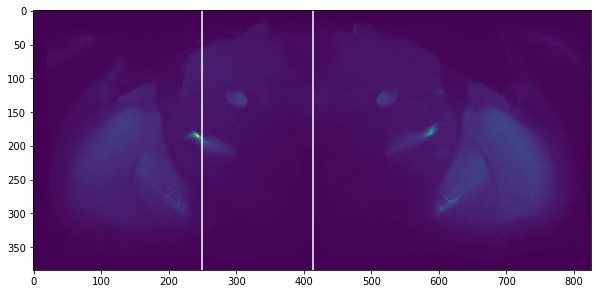

In [86]:
plt.figure(figsize=(10,10))
plt.imshow(brain[:,:,120].T)
plt.axvline(413,color='w')
plt.axvline(bbox['x_start'],color='w')

In [103]:
def draw_grid():
    for i in np.arange(0,100,20):
        plt.axvline(i,color='w')
    for i in np.arange(0,100,20):
        plt.axhline(i,color='w')

In [95]:
bbox = {'x_start': 225, 'x_end': 325,
        'y_start': 150, 'y_end': 225,
        'z_start': 40, 'z_end': 140}

In [96]:
brain_crop = brain[bbox['x_start']:bbox['x_end'],
                   bbox['y_start']:bbox['y_end'],
                   bbox['z_start']:bbox['z_end']]

In [101]:
brain_crop_flip = brain[::-1,:,:][bbox['x_start']:bbox['x_end'],
                   bbox['y_start']:bbox['y_end'],
                   bbox['z_start']:bbox['z_end']]

In [97]:
brain_crop.shape

(100, 75, 100)

(-0.5, 99.5, 99.5, -0.5)

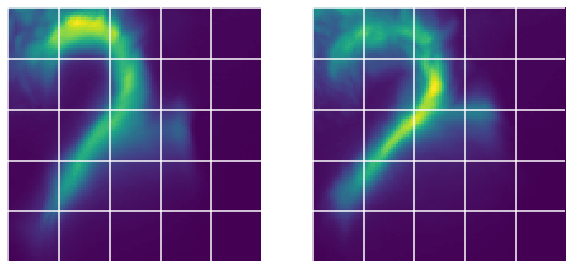

In [106]:
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(np.max(brain_crop,axis=1).T)
draw_grid()
plt.axis('off')

plt.subplot(122)
plt.imshow(np.max(brain_crop_flip,axis=1).T)
draw_grid()
plt.axis('off')


(-0.5, 84.02499999999999, 99.5, -0.5)

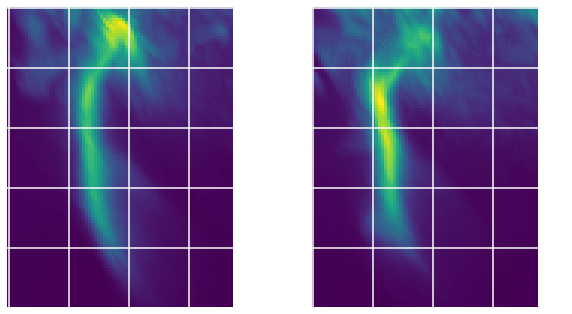

In [107]:
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(np.max(brain_crop,axis=0).T)
draw_grid()
plt.axis('off')

plt.subplot(122)
plt.imshow(np.max(brain_crop_flip,axis=0).T)
draw_grid()
plt.axis('off')


(-0.5, 99.5, 84.025, -0.5)

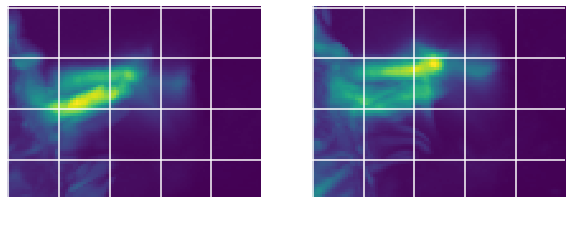

In [108]:
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(np.max(brain_crop,axis=2).T)
draw_grid()
plt.axis('off')

plt.subplot(122)
plt.imshow(np.max(brain_crop_flip,axis=2).T)
draw_grid()
plt.axis('off')


In [110]:
out = ants.registration(fixed=ants.from_numpy(brain_crop),
                        moving=ants.from_numpy(brain_crop_flip),
                        type_of_transform='Translation')

In [116]:
out

{'fwdtransforms': ['/tmp/tmpbdpc90640GenericAffine.mat'],
 'invtransforms': ['/tmp/tmpbdpc90640GenericAffine.mat'],
 'warpedfixout': ANTsImage (RAI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (100, 75, 100)
 	 Spacing    : (1.0, 1.0, 1.0)
 	 Origin     : (0.0, 0.0, 0.0)
 	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.],
 'warpedmovout': ANTsImage (RAI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (100, 75, 100)
 	 Spacing    : (1.0, 1.0, 1.0)
 	 Origin     : (0.0, 0.0, 0.0)
 	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]}

In [118]:
transform = ants.read_transform(out['fwdtransforms'][0])

In [124]:
transform.parameters

array([ 1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        , -1.17102051,
       -4.31747437, -2.20591354])

In [125]:
dist = (transform.parameters[9]**2+transform.parameters[10]**2+transform.parameters[11]**2)**.5


In [126]:
dist

4.98777791069908

(-0.5, 99.5, 84.025, -0.5)

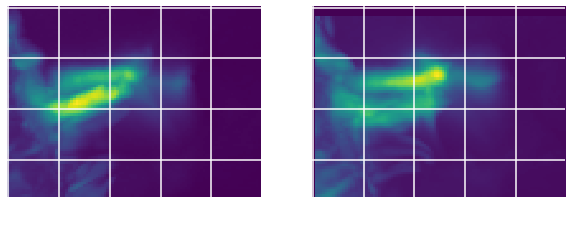

In [115]:
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(np.max(brain_crop,axis=2).T)
draw_grid()
plt.axis('off')

plt.subplot(122)
plt.imshow(np.max(out['warpedmovout'].numpy(),axis=2).T)
draw_grid()
plt.axis('off')





In [281]:
file = "/oak/stanford/groups/trc/data/Alex/albert_data/LC11/func/average_green_LC11_albert_fda.nii"
murthy = ants.image_read(file)

file = "/oak/stanford/groups/trc/data/Alex/clab_data/LC11/func/average_green_LC11_clab_fda.nii"
clan = ants.image_read(file)


In [282]:
bbox = {'x_start': 200, 'x_end': 325,
        'y_start': 150, 'y_end': 225,
        'z_start': 40, 'z_end': 140}

In [283]:
murthy_crop = murthy[bbox['x_start']:bbox['x_end'],
                   bbox['y_start']:bbox['y_end'],
                   bbox['z_start']:bbox['z_end']]
clan_crop = clan[bbox['x_start']:bbox['x_end'],
                   bbox['y_start']:bbox['y_end'],
                   bbox['z_start']:bbox['z_end']]

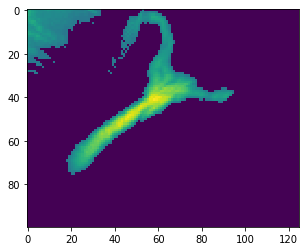

In [284]:
murthy_crop[murthy_crop<1200]=0
plt.imshow(np.max(murthy_crop,axis=axis).T)


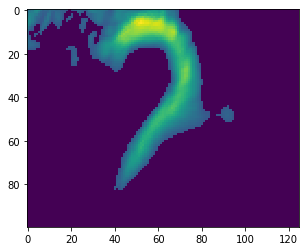

In [288]:
clan_crop[clan_crop<1500]=0
plt.imshow(np.max(clan_crop,axis=axis).T)

In [289]:
out = ants.registration(fixed=ants.from_numpy(clan_crop),
                        moving=ants.from_numpy(murthy_crop),
                        type_of_transform='Affine')

(-0.5, 124.5, 99.5, -0.5)

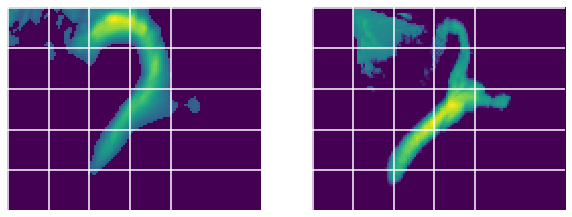

In [290]:
plt.figure(figsize=(10,10))
axis = 1

plt.subplot(121)
plt.imshow(np.max(clan_crop,axis=axis).T)
draw_grid()
plt.axis('off')

plt.subplot(122)
plt.imshow(np.max(out['warpedmovout'].numpy(),axis=axis).T)
draw_grid()
plt.axis('off')


In [210]:
thresh = np.max(clan_crop)/3
clan_crop_binary = np.zeros(clan_crop.shape)
clan_crop_binary[clan_crop>thresh]=1

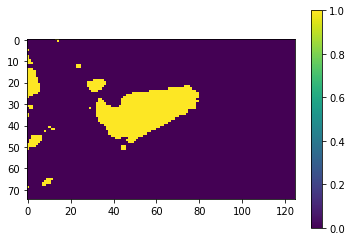

In [211]:
plt.imshow(np.max(clan_crop_binary,axis=axis).T)
plt.colorbar()

In [212]:
from skimage.morphology import skeletonize
from skimage.filters import threshold_triangle as triangle

In [213]:
axis=2
skeleton = skeletonize(clan_crop_binary)
skeleton = skeleton.astype('float')
skeleton_max = np.max(skeleton,axis=axis).T
skeleton_max[skeleton_max==0]=np.nan

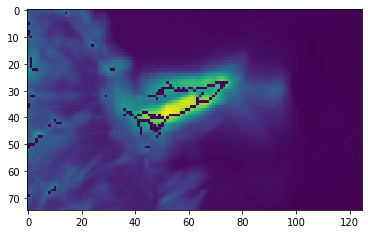

In [214]:
plt.imshow(np.max(clan_crop,axis=axis).T)
plt.imshow(skeleton_max)

In [249]:
def extract_skeleton(data,axis):
    thresh = np.max(data)/4
    crop_binary = np.zeros(data.shape)
    crop_binary[data>thresh]=1
    
    skeleton = skeletonize(crop_binary)
    skeleton = skeleton.astype('float')
    skeleton_max = np.max(skeleton,axis=axis).T
    skeleton_max[skeleton_max==0]=np.nan
    return skeleton_max

(-0.5, 124.5, 99.5, -0.5)

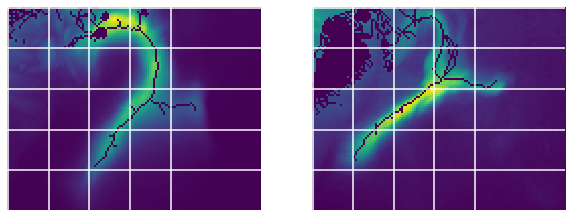

In [250]:
plt.figure(figsize=(10,10))
axis=1

plt.subplot(121)
plt.imshow(np.max(clan_crop,axis=axis).T)
skeleton = extract_skeleton(clan_crop,axis)
plt.imshow(skeleton)
draw_grid()
plt.axis('off')

plt.subplot(122)
plt.imshow(np.max(murthy_crop,axis=axis).T)
skeleton = extract_skeleton(murthy_crop,axis)
plt.imshow(skeleton)
draw_grid()
plt.axis('off')
